Data Overview:
                                            question  \
0  What are the top 3 most frequent teams in this...   
1  Count the frequency of each season in the data...   
2  Count the number of players who have scored mo...   
3  Identify the player with the highest number of...   
4  Calculate the average seasonal rating across a...   

                                        ground_truth  \
0       Man City: 99, Real Madrid: 77, Barcelona: 73   
1  {'2022/2023': 166, '2023/2024': 165, '2021/202...   
2                                         Count: 340   
3                               Player: Lionel Messi   
4                               Average Rating: 7.11   

                                  derivation difficulty  \
0                 df['Teams'].value_counts()       easy   
1               df['Seasons'].value_counts()       easy   
2                  len(df[df['Goals'] > 10])     medium   
3  df.loc[df['Assists'].idxmax(), 'Players']       easy   
4               

/var/folders/pn/hssvb63x39z2_m4tn3xrdks80000gn/T/ipykernel_48962/4048801109.py:54: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='difficulty', y='score', hue='model', data=df, ci=None, palette='viridis')
/var/folders/pn/hssvb63x39z2_m4tn3xrdks80000gn/T/ipykernel_48962/4048801109.py:56: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([label.get_text().title() for label in ax.get_xticklabels()])  # Title case for x-axis labels


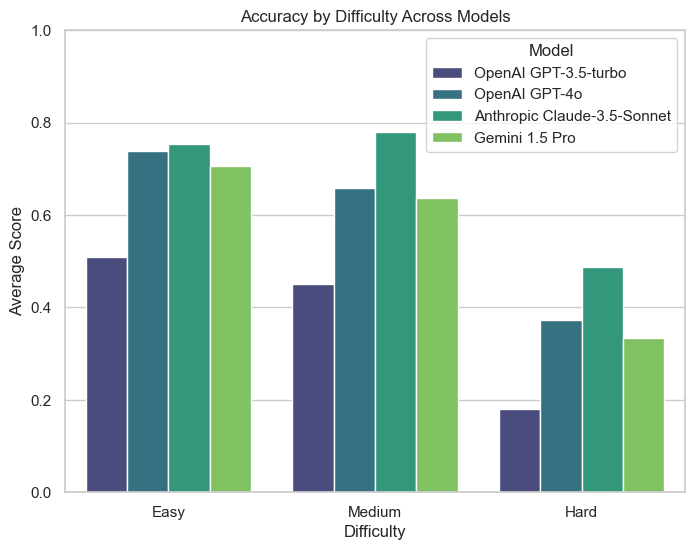

/var/folders/pn/hssvb63x39z2_m4tn3xrdks80000gn/T/ipykernel_48962/4048801109.py:65: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='type', y='score', hue='model', data=df, ci=None, palette='magma')
/var/folders/pn/hssvb63x39z2_m4tn3xrdks80000gn/T/ipykernel_48962/4048801109.py:67: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([label.get_text().title() for label in ax.get_xticklabels()], rotation=45)  # Title case and rotate x-axis labels


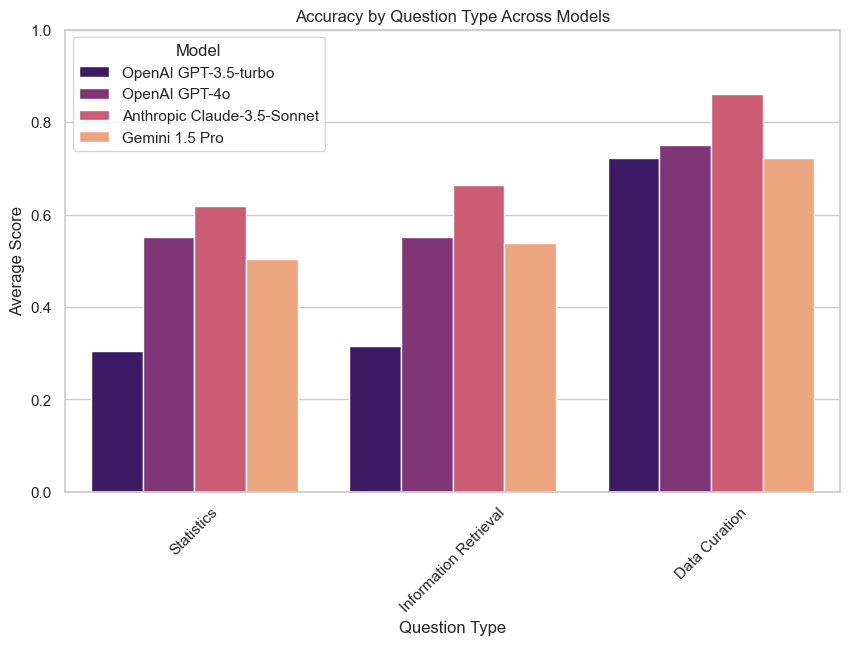

/var/folders/pn/hssvb63x39z2_m4tn3xrdks80000gn/T/ipykernel_48962/4048801109.py:76: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='subtype', y='score', hue='model', data=df, ci=None, palette='plasma')
/var/folders/pn/hssvb63x39z2_m4tn3xrdks80000gn/T/ipykernel_48962/4048801109.py:78: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([label.get_text().title() for label in ax.get_xticklabels()], rotation=45)  # Title case and rotate x-axis labels


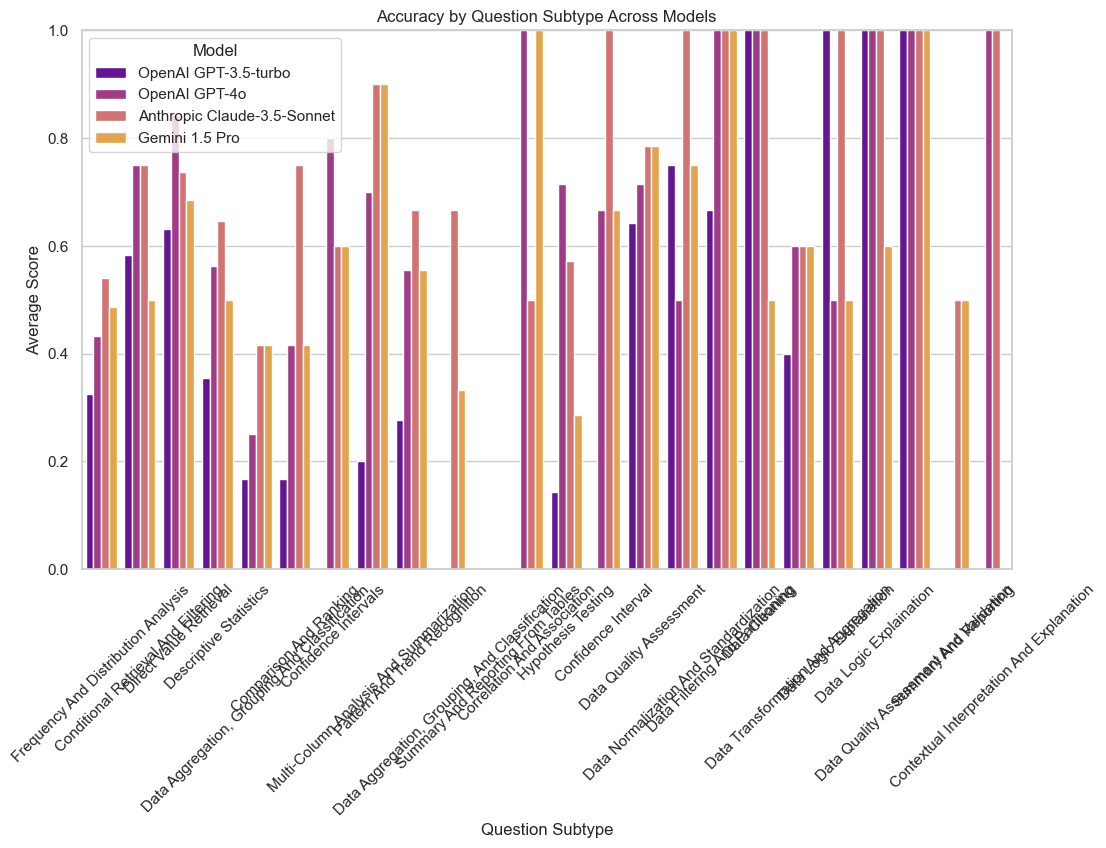

/var/folders/pn/hssvb63x39z2_m4tn3xrdks80000gn/T/ipykernel_48962/4048801109.py:88: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='file_name', y='score', hue='model', data=file_accuracy, ci=None, palette='coolwarm')
/var/folders/pn/hssvb63x39z2_m4tn3xrdks80000gn/T/ipykernel_48962/4048801109.py:90: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([label.get_text() for label in ax.get_xticklabels()], rotation=45, ha='right')  # Rotate x-axis labels


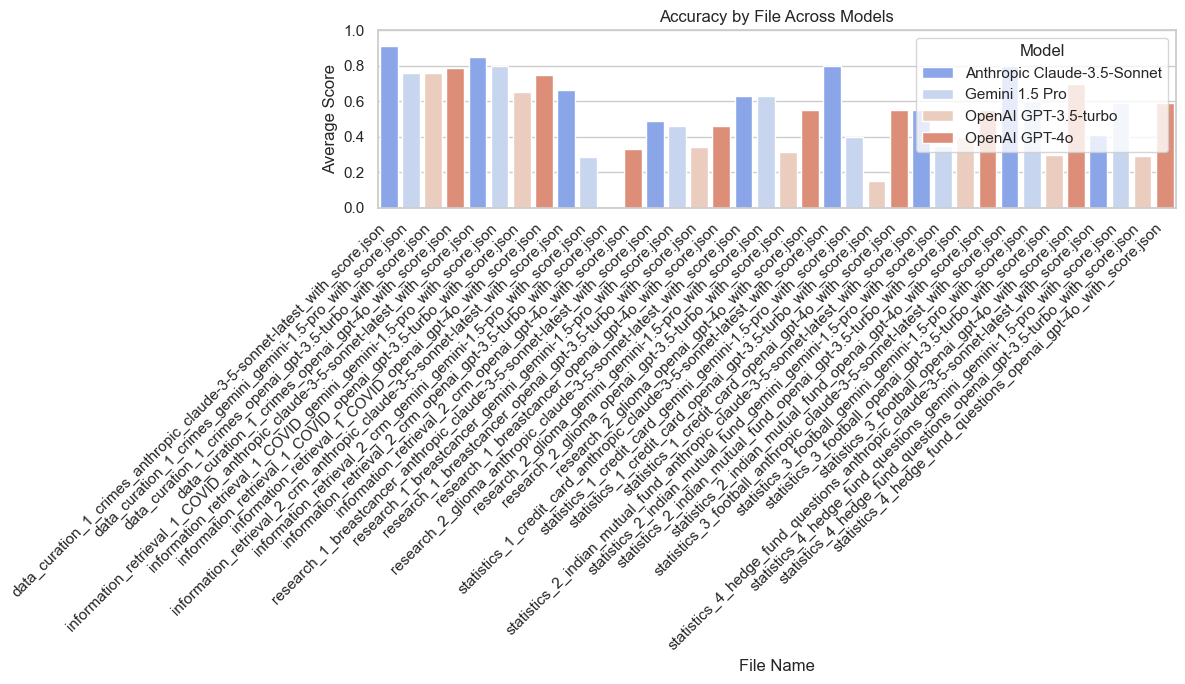


Summary Table:
                           model difficulty                   type  \
0    Anthropic Claude-3.5-Sonnet       easy          data curation   
1    Anthropic Claude-3.5-Sonnet       easy          data curation   
2    Anthropic Claude-3.5-Sonnet       easy          data curation   
3    Anthropic Claude-3.5-Sonnet       easy          data curation   
4    Anthropic Claude-3.5-Sonnet       easy  information retrieval   
..                           ...        ...                    ...   
223                OpenAI GPT-4o     medium             statistics   
224                OpenAI GPT-4o     medium             statistics   
225                OpenAI GPT-4o     medium             statistics   
226                OpenAI GPT-4o     medium             statistics   
227                OpenAI GPT-4o     medium             statistics   

                                           subtype     score  
0                  data filtering and partitioning  1.000000  
1                

In [1]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

def load_json_files_with_label(folder_path, model_name):
    combined_data = []
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.json'):
            with open(os.path.join(folder_path, file_name), 'r') as f:
                data = json.load(f)
                for entry in data:
                    entry['model'] = model_name  # Add model name
                    entry['file_name'] = file_name  # Add file name
                combined_data.extend(data)
    return combined_data


# Function to create DataFrame from combined JSON data
def create_dataframe(data):
    df = pd.DataFrame(data)
    df['subtype'] = df['subtype'].str.lower()
    df['type'] = df['type'].str.lower()
    df['difficulty'] = df['difficulty'].str.lower()
    return df

# Paths to folders for each model
model_paths = {
    'OpenAI GPT-3.5-turbo': './results_folder/gpt-3.5-turbo-scores',
    'OpenAI GPT-4o': './results_folder/gpt-4o-scores',
    'Anthropic Claude-3.5-Sonnet': './results_folder/claude-3.5-scores',
    'Gemini 1.5 Pro': './results_folder/gemini-1.5-pro-scores'
}

# Load data for all models
combined_data = []
for model_name, folder_path in model_paths.items():
    combined_data.extend(load_json_files_with_label(folder_path, model_name))

df = create_dataframe(combined_data)

print("Data Overview:")
print(df.head())

# Overall Accuracy for each model
overall_accuracy = df.groupby('model')['score'].mean() * 100
print("\nOverall Accuracy by Model:")
print(overall_accuracy)

plt.figure(figsize=(8, 6))
ax = sns.barplot(x='difficulty', y='score', hue='model', data=df, ci=None, palette='viridis')
ax.set(ylim=(0, 1.0))  # Adjust scale to 1.0
ax.set_xticklabels([label.get_text().title() for label in ax.get_xticklabels()])  # Title case for x-axis labels
plt.title('Accuracy by Difficulty Across Models')
plt.ylabel('Average Score')
plt.xlabel('Difficulty')
plt.legend(title='Model')
plt.show()

# 2. Plot Accuracy by Question Type
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='type', y='score', hue='model', data=df, ci=None, palette='magma')
ax.set(ylim=(0, 1.0))  # Adjust scale to 1.0
ax.set_xticklabels([label.get_text().title() for label in ax.get_xticklabels()], rotation=45)  # Title case and rotate x-axis labels
plt.title('Accuracy by Question Type Across Models')
plt.ylabel('Average Score')
plt.xlabel('Question Type')
plt.legend(title='Model')
plt.show()

# 3. Plot Accuracy by Question Subtype
plt.figure(figsize=(12, 7))
ax = sns.barplot(x='subtype', y='score', hue='model', data=df, ci=None, palette='plasma')
ax.set(ylim=(0, 1.0))  # Adjust scale to 1.0
ax.set_xticklabels([label.get_text().title() for label in ax.get_xticklabels()], rotation=45)  # Title case and rotate x-axis labels
plt.title('Accuracy by Question Subtype Across Models')
plt.ylabel('Average Score')
plt.xlabel('Question Subtype')
plt.legend(title='Model')
plt.show()

file_accuracy = df.groupby(['file_name', 'model'])['score'].mean().reset_index()

plt.figure(figsize=(12, 7))
ax = sns.barplot(x='file_name', y='score', hue='model', data=file_accuracy, ci=None, palette='coolwarm')
ax.set(ylim=(0, 1.0))  # Adjust scale to 1.0
ax.set_xticklabels([label.get_text() for label in ax.get_xticklabels()], rotation=45, ha='right')  # Rotate x-axis labels
plt.title('Accuracy by File Across Models')
plt.ylabel('Average Score')
plt.xlabel('File Name')
plt.legend(title='Model')
plt.tight_layout()  # Ensure everything fits well
plt.show()


summary_table = df.groupby(['model', 'difficulty', 'type', 'subtype'])['score'].mean().reset_index()
print("\nSummary Table:")
print(summary_table)



/var/folders/pn/hssvb63x39z2_m4tn3xrdks80000gn/T/ipykernel_48962/2835219862.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(
/var/folders/pn/hssvb63x39z2_m4tn3xrdks80000gn/T/ipykernel_48962/2835219862.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([label.get_text() for label in ax.get_xticklabels()], rotation=45, ha='right')


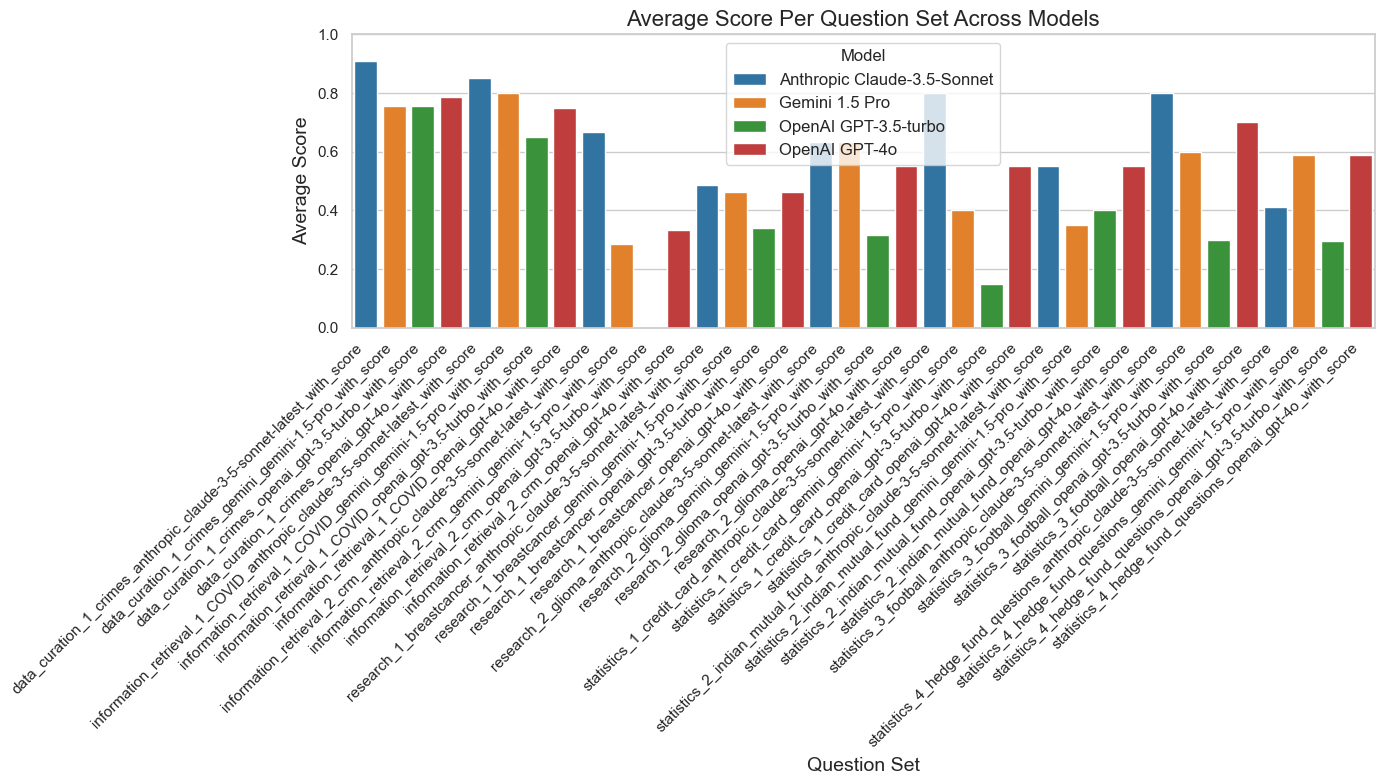

In [7]:
# Group data by file_name and model to calculate the average score for each question set
file_average_scores = df.groupby(['file_name', 'model'])['score'].mean().reset_index()

# Sort the file names for better visualization
file_average_scores['file_name'] = file_average_scores['file_name'].apply(lambda x: x.replace(".json", ""))
file_average_scores = file_average_scores.sort_values(by='file_name')

# Plot: Average score per question set for each model
plt.figure(figsize=(14, 8))
ax = sns.barplot(
    x='file_name', 
    y='score', 
    hue='model', 
    data=file_average_scores, 
    ci=None, 
    palette='tab10'
)

# Customize the plot
ax.set(ylim=(0, 1.0))  # Ensure scores are normalized (0-1)
ax.set_xticklabels([label.get_text() for label in ax.get_xticklabels()], rotation=45, ha='right')
plt.title('Average Score Per Question Set Across Models', fontsize=16)
plt.ylabel('Average Score', fontsize=14)
plt.xlabel('Question Set', fontsize=14)
plt.legend(title='Model', fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()


/var/folders/pn/hssvb63x39z2_m4tn3xrdks80000gn/T/ipykernel_48962/2562311577.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(
/var/folders/pn/hssvb63x39z2_m4tn3xrdks80000gn/T/ipykernel_48962/2562311577.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # Rotate x-axis labels


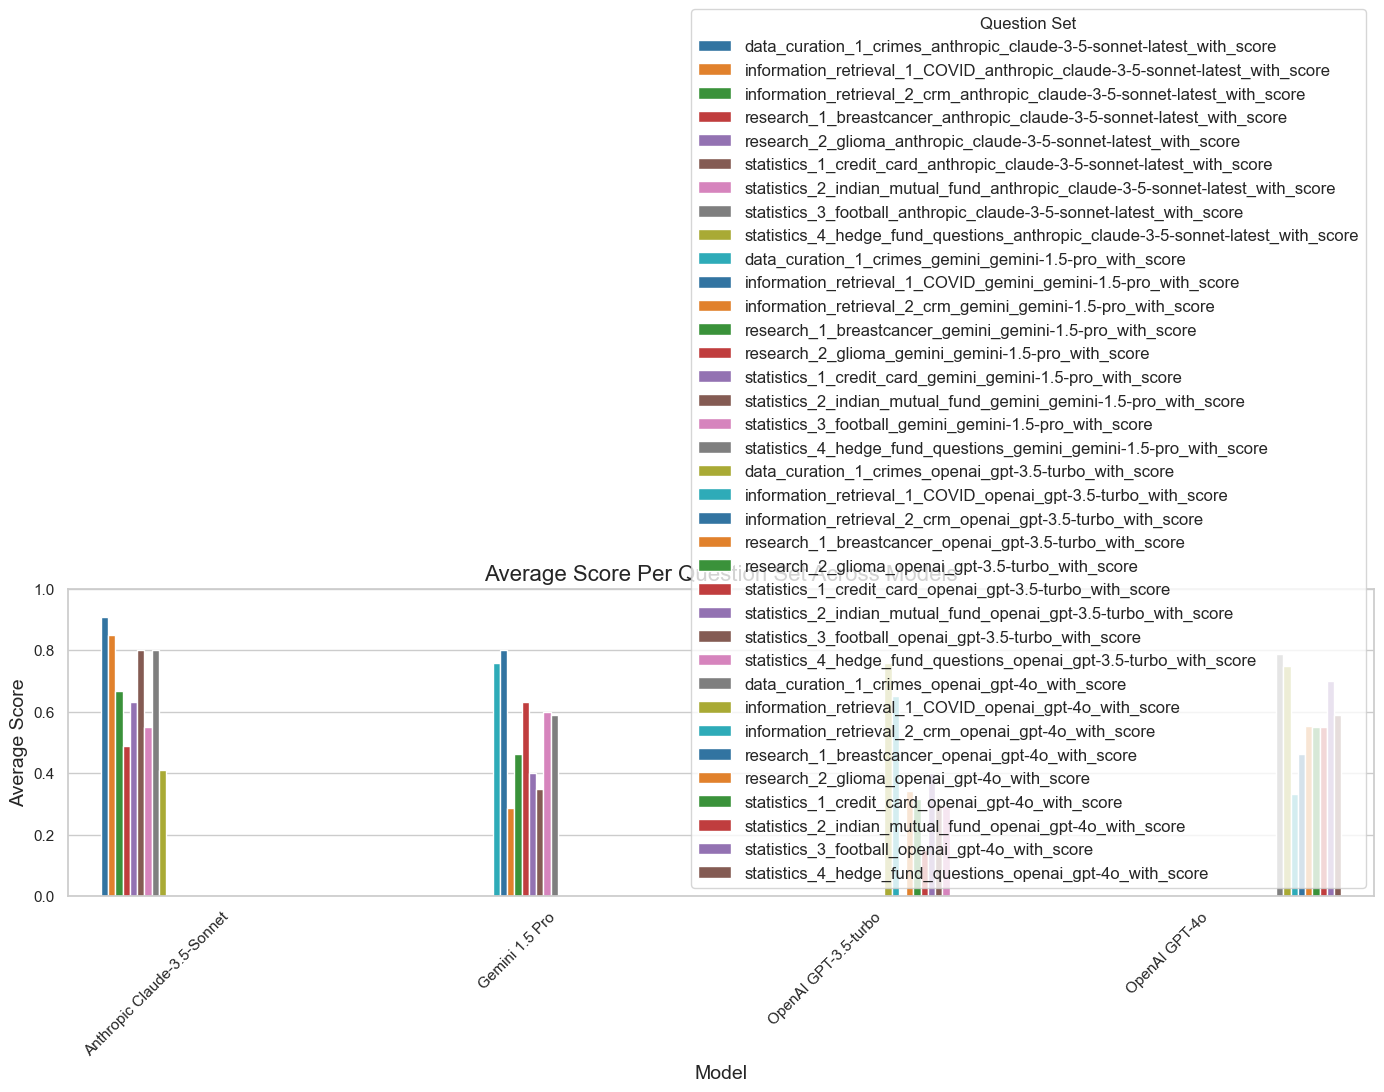

In [8]:
# Group data by file_name and model to calculate the average score for each question set
file_average_scores = df.groupby(['file_name', 'model'])['score'].mean().reset_index()

# Sort the file names for better visualization
file_average_scores['file_name'] = file_average_scores['file_name'].apply(lambda x: x.replace(".json", ""))
file_average_scores = file_average_scores.sort_values(by=['model', 'file_name'])

# Plot: Average score per question set for each model
plt.figure(figsize=(14, 8))
ax = sns.barplot(
    x='model', 
    y='score', 
    hue='file_name',  # Color by question set
    data=file_average_scores, 
    ci=None, 
    palette='tab10'
)

# Customize the plot
ax.set(ylim=(0, 1.0))  # Ensure scores are normalized (0-1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # Rotate x-axis labels
plt.title('Average Score Per Question Set Across Models', fontsize=16)
plt.ylabel('Average Score', fontsize=14)
plt.xlabel('Model', fontsize=14)
plt.legend(title='Question Set', fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()


/var/folders/pn/hssvb63x39z2_m4tn3xrdks80000gn/T/ipykernel_48962/3425698913.py:41: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(
/var/folders/pn/hssvb63x39z2_m4tn3xrdks80000gn/T/ipykernel_48962/3425698913.py:52: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # Rotate x-axis labels


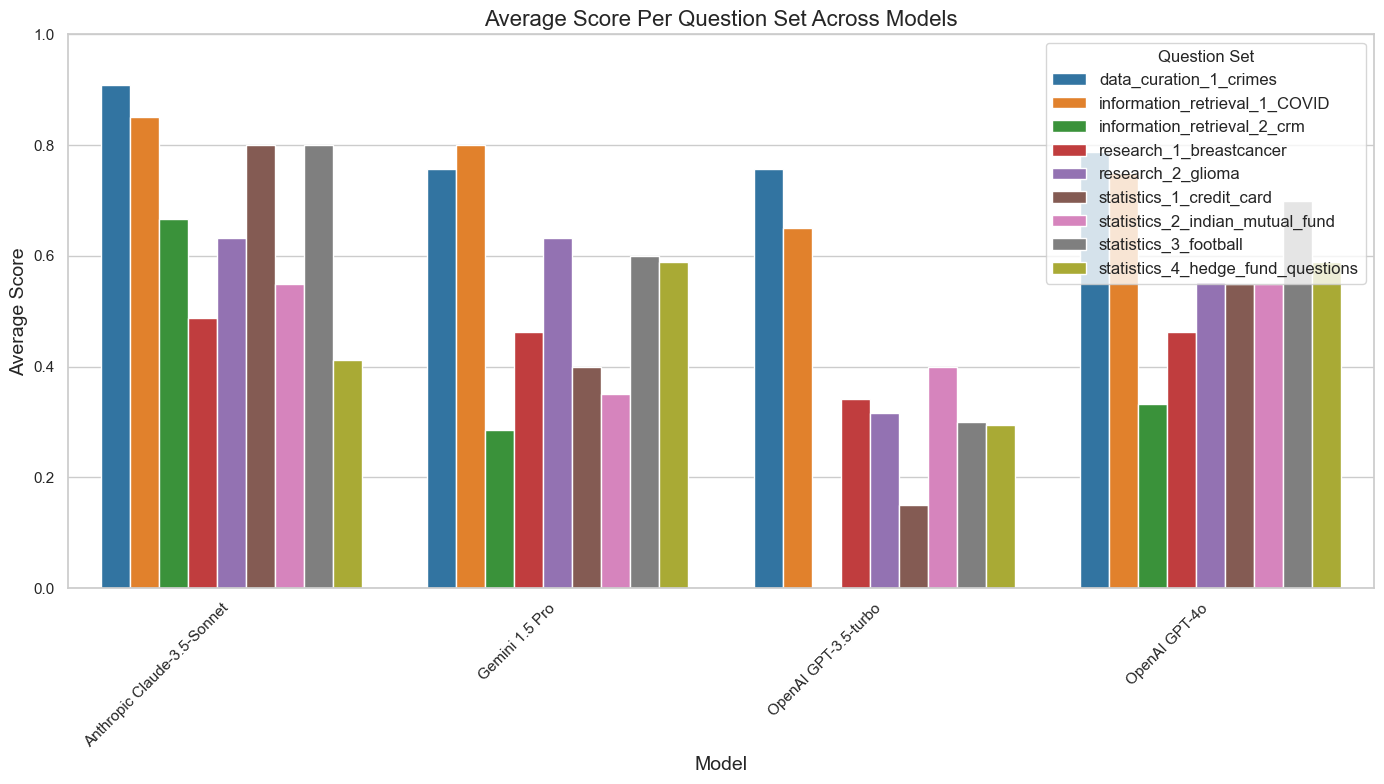

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the substrings for the 9 question sets
question_sets_substrings = [
    "data_curation_1_crimes",
    "information_retrieval_1_COVID",
    "information_retrieval_2_crm",
    "research_1_breastcancer",
    "research_2_glioma",
    "statistics_1_credit_card",
    "statistics_2_indian_mutual_fund",
    "statistics_3_football",
    "statistics_4_hedge_fund_questions"
]

# Define a custom palette with 9 colors for the substrings
custom_palette = dict(zip(question_sets_substrings, sns.color_palette("tab10", len(question_sets_substrings))))

# Group data by file_name and model to calculate the average score for each question set
file_average_scores = df.groupby(['file_name', 'model'])['score'].mean().reset_index()

# Map the substrings to determine the corresponding color
def map_to_question_set(file_name):
    for substring in question_sets_substrings:
        if substring in file_name:
            return substring
    return "Other"

# Apply the mapping function to a new column
file_average_scores['question_set'] = file_average_scores['file_name'].apply(map_to_question_set)

# Filter out rows that don't match the question sets
file_average_scores = file_average_scores[file_average_scores['question_set'] != "Other"]

# Sort the data for better visualization
file_average_scores = file_average_scores.sort_values(by=['model', 'question_set'])

# Plot: Average score per question set for each model
plt.figure(figsize=(14, 8))
ax = sns.barplot(
    x='model',
    y='score',
    hue='question_set',  # Color by question set
    data=file_average_scores,
    ci=None,
    palette=custom_palette  # Use the custom palette with 9 colors
)

# Customize the plot
ax.set(ylim=(0, 1.0))  # Ensure scores are normalized (0-1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # Rotate x-axis labels
plt.title('Average Score Per Question Set Across Models', fontsize=16)
plt.ylabel('Average Score', fontsize=14)
plt.xlabel('Model', fontsize=14)
plt.legend(title='Question Set', fontsize=12, loc='upper right')
plt.tight_layout()

# Show the plot
plt.show()


/var/folders/pn/hssvb63x39z2_m4tn3xrdks80000gn/T/ipykernel_48962/163391216.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(
/var/folders/pn/hssvb63x39z2_m4tn3xrdks80000gn/T/ipykernel_48962/163391216.py:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # Rotate x-axis labels


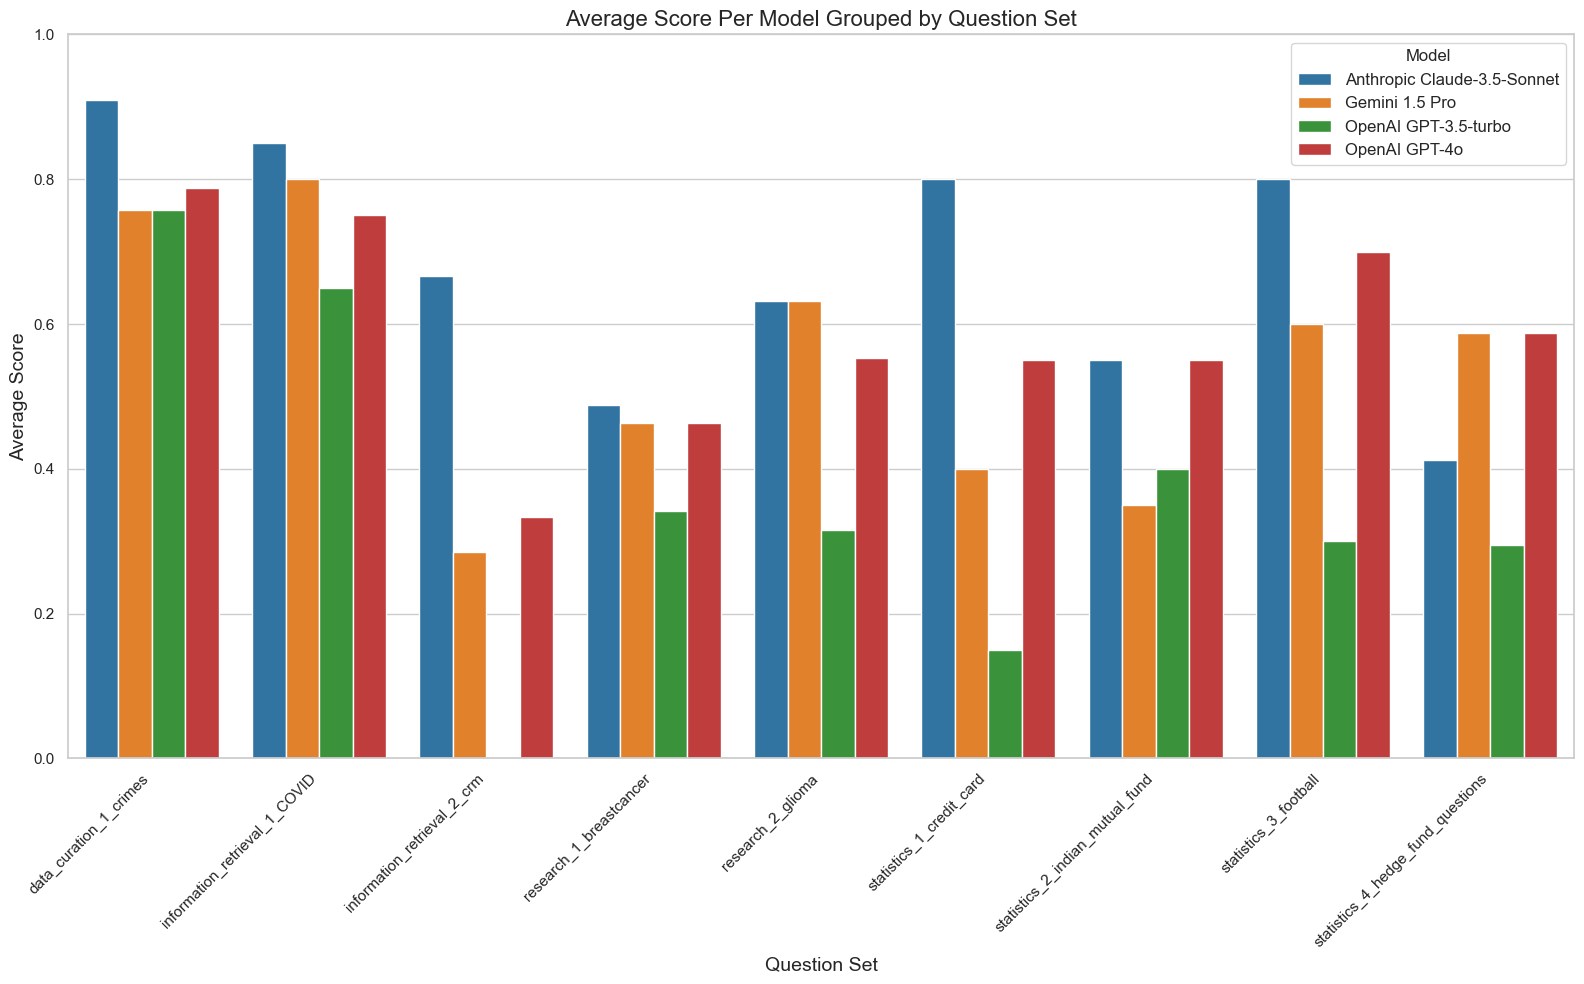

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group data by file_name and model to calculate the average score for each question set
file_average_scores = df.groupby(['file_name', 'model'])['score'].mean().reset_index()

# Map the substrings to determine the corresponding question set
def map_to_question_set(file_name):
    for substring in question_sets_substrings:
        if substring in file_name:
            return substring
    return "Other"

# Apply the mapping function to a new column
file_average_scores['question_set'] = file_average_scores['file_name'].apply(map_to_question_set)

# Filter out rows that don't match the question sets
file_average_scores = file_average_scores[file_average_scores['question_set'] != "Other"]

# Sort the data for better visualization
file_average_scores = file_average_scores.sort_values(by=['question_set', 'model'])

# Define a custom palette with distinct colors for models
models = file_average_scores['model'].unique()
custom_palette = dict(zip(models, sns.color_palette("tab10", len(models))))

# Plot: Average score per question set, grouped by question sets, colored by models
plt.figure(figsize=(16, 10))
ax = sns.barplot(
    x='question_set',  # Grouped by question set
    y='score',
    hue='model',  # Color by model
    data=file_average_scores,
    ci=None,
    palette=custom_palette  # Use the custom palette with distinct model colors
)

# Customize the plot
ax.set(ylim=(0, 1.0))  # Ensure scores are normalized (0-1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # Rotate x-axis labels
plt.title('Average Score Per Model Grouped by Question Set', fontsize=16)
plt.ylabel('Average Score', fontsize=14)
plt.xlabel('Question Set', fontsize=14)
plt.legend(title='Model', fontsize=12, loc='upper right')
plt.tight_layout()

# Show the plot
plt.show()
